In [6]:
import cv2
import numpy
from collections import deque

In [7]:
def SAD(img1,img2): #sum of absoloute difference
    diff =  cv2.absdiff(img1,img2)
    diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(diff_gray, (5, 5), 0)
    return blur.mean()

In [8]:
def bgr(arr,typ,run=False):
    
    noisecap=2.0
    currentFrame = arr.pop(0)
    fgbg = cv2.createBackgroundSubtractorMOG2()
    outque=[]
    length = len(arr)
    
    for i in range(length):
        nextFrame = arr.pop(0)
        if(SAD(currentFrame,nextFrame) > noisecap):
            currentFrame=nextFrame
            fgmask1 = fgbg.apply(nextFrame) 
            if(typ=="serial"):
                for i in range(540):
                    for j in range(960):
                        if (fgmask1[i][j] < 200):
                            fgmask1[i][j] = 0
                        else:
                            fgmask1[i][j] = 255
            else:
                fgmask = cv2.threshold(fgmask1, 200, 255, cv2.THRESH_BINARY)
                outque.append(fgmask)
            if(run):
                outque.append(fgmask1)
                cv2.imshow('fgmask', fgmask1)
                cv2.imshow('frame',nextFrame)
                k = cv2.waitKey(30) & 0xff
                if k == 27:
                    break
    if(run):
        cv2.destroyAllWindows()
    return outque

In [9]:
def split(value):
    
    cap = cv2.VideoCapture("vid2.mp4")
    main = []
    while(1):
        ret, nextFrame = cap.read()
        if(nextFrame is None):
            break
        main.append(nextFrame)

    chunks = [main[x:x+value] for x in range(0, len(main), value)]
    
    return chunks

In [10]:
import pymp
def mainp(value):
    chunks = split(value)
    outque=[]
    with pymp.Parallel(4) as p:
        for i in p.iterate(chunks):
            outque.append(bgr(i,"parallel"))
    return outque

In [11]:
def main(typ):
    chunks = split(300)
    outque =[]
    for i in chunks:
        if(typ=="parallel"):
            run=True
        else:
            run=False
        outque.append(bgr(i,typ,run))
        return outque

### Serial Computing

In [12]:
import time
start = time. time()
chunks = main("serial")
end = time. time()
speedup_vector = [end-start]

### Parallel computing at image level only 

In [18]:
start = time. time()
chunks = main("parallel")
end = time. time()
speedup_vector.append([end-start])

### Parallel computing at image and frame level

In [19]:
for i in range(20,150,20):
    start = time. time()
    chunks = mainp(i)
    end = time. time()
    speedup_vector.append(end-start)

In [19]:
speedup_vector.reverse()

In [15]:
speedup_vector

[9.871831893920898,
 3.1377487182617188,
 3.6686840057373047,
 3.5337748527526855,
 3.8520724773406982,
 4.239036798477173,
 4.014232635498047,
 4.573878526687622]

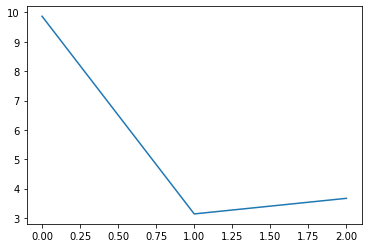

In [16]:
import matplotlib.pyplot as plt
plt.plot(speedup_vector[:3])
plt.show()

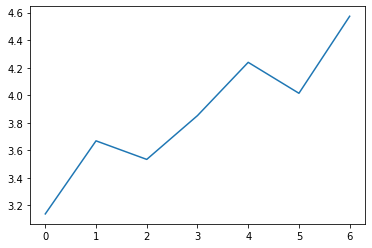

In [17]:
plt.plot(speedup_vector[1:])
plt.show()

In [17]:
#chunks = ch1+ch2+ch3
import matplotlib.pyplot as plt
import os
def create_video(chunks):

    i = 1000000

    for im in chunks:
        plt.imsave('images/'+str(i)+'.png',im,cmap="binary")
        i+=1
        
    image_folder = 'images'
    video_name = 'log/crash_log.avi'

    images = [img for img in os.listdir(image_folder)
            if img.endswith(".jpg") or
                img.endswith(".jpeg") or
                img.endswith("png")]

    images.sort()

    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape  
    video = cv2.VideoWriter(video_name, 0, 15, (width, height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    video.release()

In [141]:
create_video(chunks[0][1:])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
iterate()